In [1]:
import numpy as np
interest_rates=np.array([0.03,0.05,0.07])
future_values=np.exp(interest_rates)
present_values=1/future_values
display(present_values)

array([0.97044553, 0.95122942, 0.93239382])

In [2]:
present_values*future_values

array([1., 1., 1.])

In [3]:
import pandas as pd
url='https://home.treasury.gov/resource-center/data-chart-center/\
interest-rates/daily-treasury-rates.csv/all/202409?\
type=daily_treasury_bill_rates&field_tdr_date_value_month=202209&page&_format=csv'
Tbill_data_site = pd.read_csv(url,index_col='Date')
display(Tbill_data_site.loc['09/12/2024'])

4 WEEKS BANK DISCOUNT         4.97
4 WEEKS COUPON EQUIVALENT     5.06
8 WEEKS BANK DISCOUNT         4.98
8 WEEKS COUPON EQUIVALENT     5.09
13 WEEKS BANK DISCOUNT        4.85
13 WEEKS COUPON EQUIVALENT    4.98
17 WEEKS BANK DISCOUNT        4.74
17 WEEKS COUPON EQUIVALENT    4.88
26 WEEKS BANK DISCOUNT        4.54
26 WEEKS COUPON EQUIVALENT    4.71
52 WEEKS BANK DISCOUNT        3.93
52 WEEKS COUPON EQUIVALENT    4.10
Name: 09/12/2024, dtype: float64

In [4]:
import os
import sys
import requests
from types import ModuleType

In [5]:
# Define the URL of the Python module to be downloaded from Dropbox.
# The 'dl=1' parameter in the URL forces a direct download of the file content.
url= 'https://www.dropbox.com/scl/fi/4y5hjxlfphh1ngvbgo77q/\
module_-basic_concepts_fixed_income.py?rlkey=6oxi7mgka42veaat79hcv8boz&st=stuou11h&dl=1'
module_name='basic_concepts_fixed_income'
# Send an HTTP GET request to the URL and store the server's response.
try:
  response=requests.get(url)
  # Raise an exception for bad status codes (like 404 Not Found)
  response.raise_for_status()
  module= ModuleType(module_name)
  #Code contained in response.text executed
  exec(response.text, module.__dict__)
  # Module added to sys
  sys.modules[module_name]=module
except requests.exceptions.RequestException as e:
    print(f"❌ Error: Could not fetch module from URL. {e}")
except Exception as e:
    print(f"❌ Error: Failed to execute or import the module. {e}")
# Open the local file in "write binary" ('wb') mode and save the downloaded content.
# Using a 'with' statement ensures the file is properly closed after writing.

# Now that 'basic_concepts_fixed_income' exists in the notebook, import the specific functions
from basic_concepts_fixed_income import(one_y_axis)

In [6]:
desired_columns = [column for column in Tbill_data_site.columns if 'BANK' in column]
df_bankers_discount = Tbill_data_site[desired_columns]

In [7]:
bankers_discount=df_bankers_discount.to_numpy()

In [8]:
maturity_days=np.array([4*7,8*7,13*7,17*7,26*7,52*7])
zero_prices_one=(100-bankers_discount*maturity_days/360)/100

In [9]:
spot_rates=-np.log(zero_prices_one)/(maturity_days/365)

In [10]:
forward_rates=-np.diff(np.log(zero_prices_one))*365/np.diff(maturity_days)
forward_rates=np.insert(forward_rates,0,np.nan,axis=1)

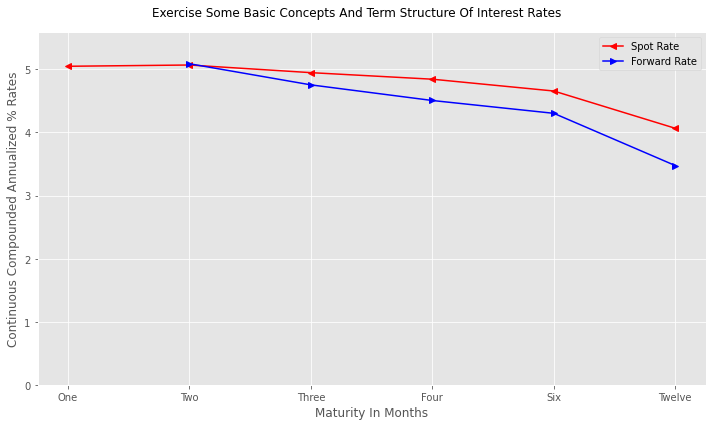

In [11]:
save_config={}
xaxis = ['One', 'Two', 'Three','Four', 'Six', 'Twelve']
string_date = '09/12/2024'
loc = Tbill_data_site.index.get_indexer([string_date])[0]
data = [spot_rates[loc]*100, forward_rates[loc]*100]
title = 'Exercise Some Basic Concepts And Term Structure Of Interest Rates'
series = ['Spot Rate', 'Forward Rate']
ylabel = 'Continuous Compounded Annualized % Rates'
xlabel = 'Maturity In Months'
x = len(data)
markers = ['<','>']*round(x/2+x%2+0.001)
lower = 0
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5
ylim = [lower, upper]
size = (10, 6)
colors=['r','b']
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)